# Projeto Iris Machine Learning

* **Objetivo prever a especie de planta a partir das caracteristicas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [2]:
df = pd.read_csv('../data/iris.csv')
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [3]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.shape

(150, 6)

Text(0.5, 1.0, 'Histograma PetalWidthCm')

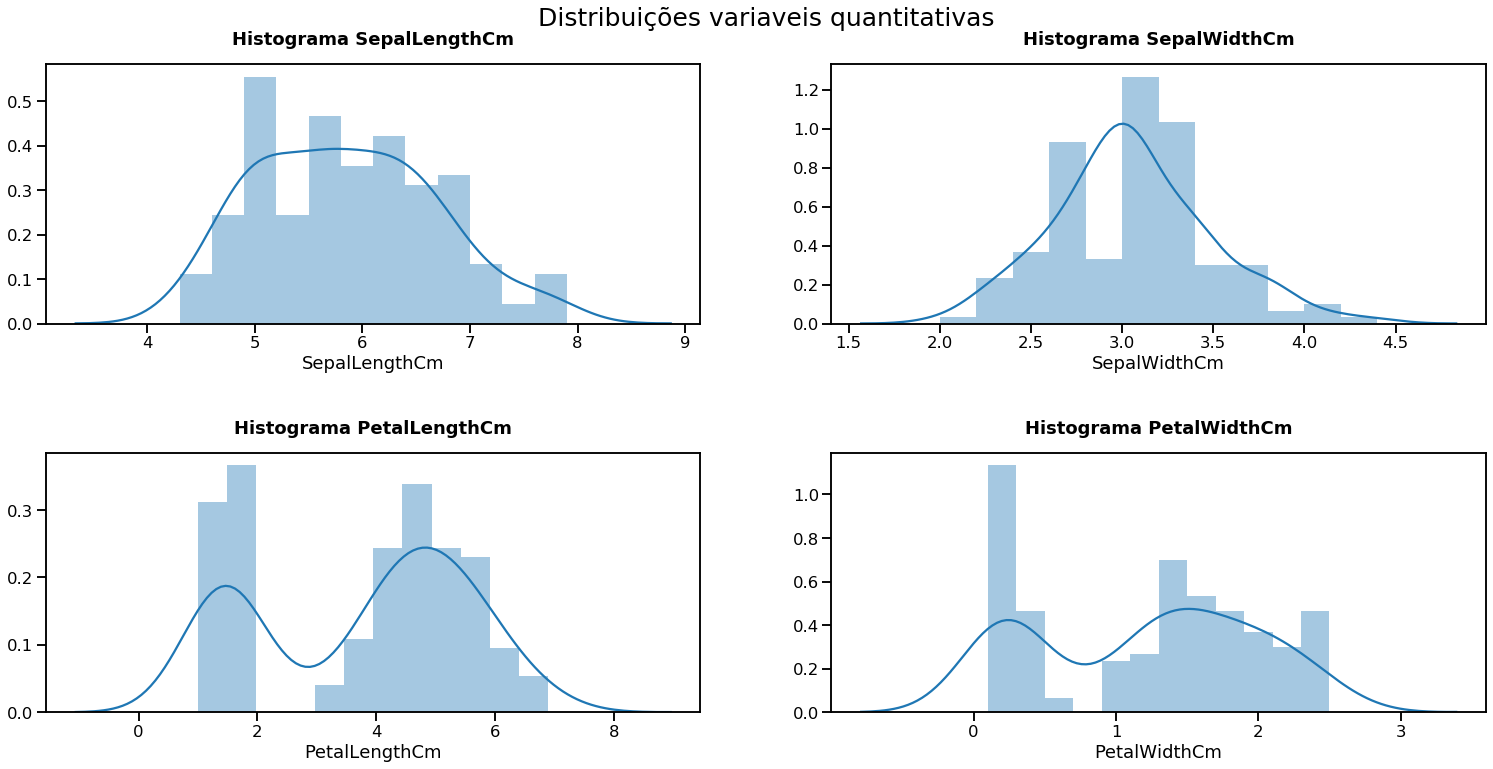

In [10]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(left=0, bottom=0, right=1, top=0.9, wspace=0.2, hspace=0.5)
ax1 = fig.add_subplot(2,2,1, )
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

colunas = list(df.columns)
del colunas[0] 
del colunas[4]
colunas

bins = 12

titulos = ['Histograma ' + colunas[i] for i in range(len(colunas))]
# sns.set_context("talk")
fig.suptitle('Distribuições variaveis quantitativas', fontsize=25)

sns.set_context("talk")
sns.distplot(df[colunas[0]], bins=bins, hist_kws={'density':True}, ax=ax1)
ax1.set_title(titulos[0], fontsize=18, fontweight='bold', pad=20)

sns.distplot(df[colunas[1]], bins=bins, hist_kws={'density':True}, ax=ax2)
ax2.set_title(titulos[1], fontsize=18, fontweight='bold', pad=20)

sns.distplot(df[colunas[2]], bins=bins, hist_kws={'density':True}, ax=ax3)
ax3.set_title(titulos[2], fontsize=18, fontweight='bold', pad=20)

sns.distplot(df[colunas[3]], bins=bins, hist_kws={'density':True}, ax=ax4)
ax4.set_title(titulos[3], fontsize=18, fontweight='bold', pad=20)

In [11]:
df.groupby(df.Species).agg(['mean', 'std'])

Id           SepalLengthCm           SepalWidthCm  \
                  mean       std          mean       std         mean   
Species                                                                 
Iris-setosa       25.5  14.57738         5.006  0.352490        3.418   
Iris-versicolor   75.5  14.57738         5.936  0.516171        2.770   
Iris-virginica   125.5  14.57738         6.588  0.635880        2.974   

                          PetalLengthCm           PetalWidthCm            
                      std          mean       std         mean       std  
Species                                                                   
Iris-setosa      0.381024         1.464  0.173511        0.244  0.107210  
Iris-versicolor  0.313798         4.260  0.469911        1.326  0.197753  
Iris-virginica   0.322497         5.552  0.551895        2.026  0.274650

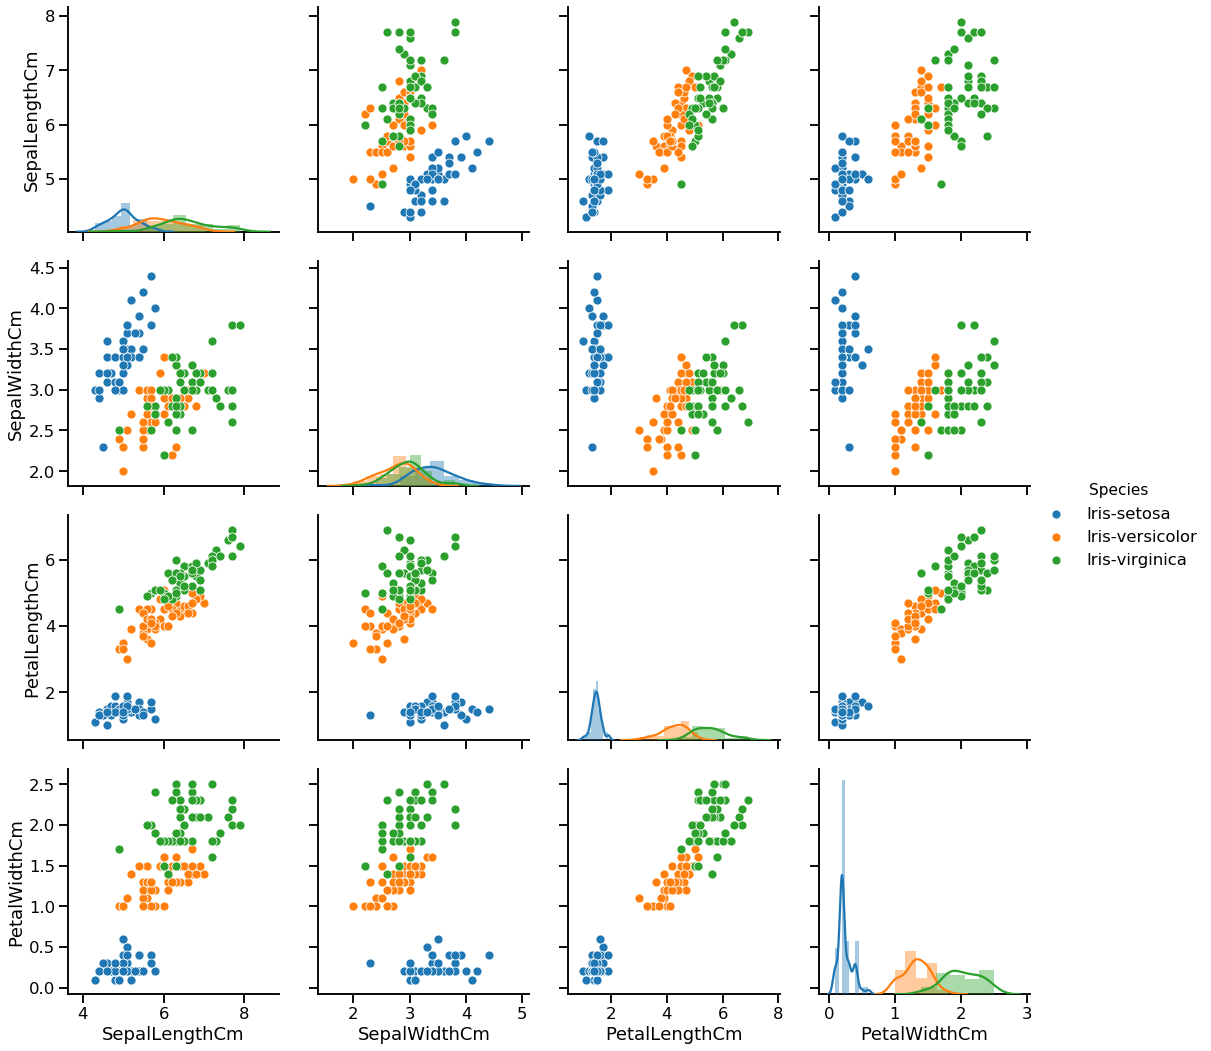

In [13]:
novas_colunas = list(df.columns)
del novas_colunas[0]


g = sns.PairGrid(df[novas_colunas], hue='Species')
g.fig.set_size_inches(15,15)
sns.set_context('talk')
g.map_diag(sns.distplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [14]:
from sklearn.model_selection import train_test_split

y = df.Species
X = df[colunas]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
pd.get_dummies(df.Species)

Iris-setosa  Iris-versicolor  Iris-virginica
0              1                0               0
1              1                0               0
2              1                0               0
3              1                0               0
4              1                0               0
..           ...              ...             ...
145            0                0               1
146            0                0               1
147            0                0               1
148            0                0               1
149            0                0               1

[150 rows x 3 columns]